In [4]:
import sqlite3
conn = sqlite3.connect('C:/Users/vishesh/Downloads/kinara_assessment_20190807.db')
cursor = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [5]:
# Read tables and columns
tableList = []
for table in cursor.execute("select name from sqlite_master where type = 'table';"):
    tableList.append(table[0])

In [6]:
tableList

['loan_information',
 'enterprise_information',
 'scores_information',
 'disbursement_information']

In [7]:
# Read columns
for table in tableList:
    print("For table '"+table+"'  --")
    for columns in cursor.execute("PRAGMA table_info("+table+");"):
        print(columns)
    print('\n\n')

For table 'loan_information'  --
(0, 'loan_id', 'INTEGER', 0, None, 0)
(1, 'account_number', 'TEXT', 0, None, 0)
(2, 'customer_id', 'INTEGER', 0, None, 0)
(3, 'enterprise_id', 'REAL', 0, None, 0)
(4, 'screening_date', 'DATE', 0, None, 0)
(5, 'product_code', 'TEXT', 0, None, 0)
(6, 'hub_id', 'INTEGER', 0, None, 0)



For table 'enterprise_information'  --
(0, 'loan_id', 'INTEGER', 0, None, 0)
(1, 'business_type', 'TEXT', 0, None, 0)
(2, 'business_activity', 'TEXT', 0, None, 0)
(3, 'business_sector', 'TEXT', 0, None, 0)
(4, 'enterprise_id', 'REAL', 0, None, 0)



For table 'scores_information'  --
(0, 'loan_id', 'INTEGER', 0, None, 0)
(1, 'ManagAgeui_APP', 'REAL', 0, None, 0)
(2, 'BusinFormalityOfTheBusinessui', 'TEXT', 0, None, 0)
(3, 'ManagCBscoreui_APP', 'REAL', 0, None, 0)



For table 'disbursement_information'  --
(0, 'account_number', 'TEXT', 0, None, 0)
(1, 'total_disbursement_amount', 'REAL', 0, None, 0)
(2, 'disbursement_month', 'TEXT', 0, None, 0)





In [8]:
# READ TOP 2 rows from each table
for table in tableList:
    print("For table '"+table+"'  --")
    for rows in cursor.execute("select * from "+table+" LIMIT 2;"):
        print(rows)
    print('\n\n')

For table 'loan_information'  --
(29321, None, 71846, 24500.0, '2018-04-19', None, 53)
(13613, 'TLWCU0003070', 31083, 10723.0, '2017-08-10', 'TLWCU', 39)



For table 'enterprise_information'  --
(29321, None, 'Job Work', 'Machine  Components', 24500.0)
(13613, 'Trading', 'Retail', 'Electronics', 10723.0)



For table 'scores_information'  --
(29321, 27.0, None, 776.0)
(13613, 30.0, 'Invoice & Banked', 616.0)



For table 'disbursement_information'  --
(None, None, None)
('TLWCU0003070', 400000.0, 'Aug-2017')





In [9]:
# PREPARE THE WHOLE DATASET, by merging all the tables based on the 
# relevant keys 
# This also creates the merged table 'loan_DataSet' in the database
dataSet = cursor.execute("CREATE TABLE loan_DataSet AS  "+
                "SELECT LI.loan_id, LI.account_number, customer_id, LI.enterprise_id, "+
                "screening_date,product_code, hub_id, business_type, business_activity, "+
                "business_sector, ManagAgeui_APP, BusinFormalityOfTheBusinessui, "+
                "ManagCBscoreui_APP,total_disbursement_amount, disbursement_month "+
                "FROM loan_information LI INNER JOIN enterprise_information EI "+
                "ON LI.loan_id = EI.loan_id "+
                "AND LI.enterprise_id = EI.enterprise_id "+
                "INNER JOIN scores_information SI "+
                "ON SI.loan_id = LI.loan_id "
                "INNER JOIN disbursement_information DI "+
                "on LI.account_number = DI.account_number ")

In [10]:
for columns in cursor.execute("PRAGMA table_info(loan_DataSet);"):
        print(columns)

(0, 'loan_id', 'INT', 0, None, 0)
(1, 'account_number', 'TEXT', 0, None, 0)
(2, 'customer_id', 'INT', 0, None, 0)
(3, 'enterprise_id', 'REAL', 0, None, 0)
(4, 'screening_date', 'NUM', 0, None, 0)
(5, 'product_code', 'TEXT', 0, None, 0)
(6, 'hub_id', 'INT', 0, None, 0)
(7, 'business_type', 'TEXT', 0, None, 0)
(8, 'business_activity', 'TEXT', 0, None, 0)
(9, 'business_sector', 'TEXT', 0, None, 0)
(10, 'ManagAgeui_APP', 'REAL', 0, None, 0)
(11, 'BusinFormalityOfTheBusinessui', 'TEXT', 0, None, 0)
(12, 'ManagCBscoreui_APP', 'REAL', 0, None, 0)
(13, 'total_disbursement_amount', 'REAL', 0, None, 0)
(14, 'disbursement_month', 'TEXT', 0, None, 0)


In [13]:
# Read few lines from the dataSet
for rows in cursor.execute("select * from loan_DataSet;"):
    print(rows)

(13613, 'TLWCU0003070', 31083, 10723.0, '2017-08-10', 'TLWCU', 39, 'Trading', 'Retail', 'Electronics', 30.0, 'Invoice & Banked', 616.0, 400000.0, 'Aug-2017')
(49742, 'TLWCS0012623', 119694, 40426.0, '2018-12-24', 'TLWCS', 27, 'Manufacturing', 'Job Work & Sales', 'Textiles', 30.0, 'Cash & Non Banked', 689.0, 500000.0, 'Jan-2019')
(65458, 'TLWCS0016745', 150404, 50738.0, '2019-06-26', 'TLWCS', 41, 'Manufacturing', 'Sales', 'Rubber', 49.0, 'Invoice & Non Banked', 793.0, 400000.0, 'Jun-2019')
(20064, 'TLWCS0002705', 49773, 17187.0, '2017-11-17', 'TLWCS', 34, 'Manufacturing', 'Sales', 'Plastics', 34.0, 'Invoice & Banked', 718.0, 500000.0, 'Dec-2017')
(4378, '0014LTL2000211', 6640, 75.0, None, 'TLWCU', 20, 'Trading', 'Retail', 'Fashion', 46.0, 'Cash & Non Banked', 0.0, 150000.0, 'Jun-2016')
(63106, 'TLWCU0014346', 119321, 40309.0, '2019-05-27', 'TLWCU', 40, 'Manufacturing', 'Job Work & Sales', 'Textiles', 37.0, 'Invoice & Banked', 766.0, 600000.0, 'May-2019')
(31303, 'LCRDS0000595', 7827, 12

(9337, 'TLWCS0000847', 19629, 6893.0, '2017-03-19', 'TLWCS', 8, 'Manufacturing', 'Sales', 'Food Products', 31.0, 'Invoice & Non Banked', 650.0, 350000.0, 'Mar-2017')
(22746, 'TLWCS0003277', 56458, 19390.0, '2018-01-10', 'TLWCS', 20, 'Manufacturing', 'Job Work & Sales', 'Machine  Components', 47.0, 'Invoice & Non Banked', 542.0, 200000.0, 'Feb-2018')
(14878, 'TLWCU0003969', 34373, 11800.0, '2017-09-12', 'TLWCU', 49, 'Manufacturing', 'Sales', 'Rubber', 39.0, 'Invoice & Non Banked', 0.0, 100000.0, 'Sep-2017')
(39839, 'TLWCU0010124', 96486, 32721.0, '2018-09-17', 'TLWCU', 97, 'Manufacturing', 'Job Work', 'Wood', 40.0, 'Cash & Non Banked', 710.0, 100000.0, 'Sep-2018')
(29535, 'TLWCS0005416', 72401, 24683.0, '2018-04-23', 'TLWCS', 65, 'Manufacturing', 'Sales', 'Auto Components', 38.0, 'Invoice & Banked', 729.0, 500000.0, 'May-2018')
(4133, '0013LTL1000381', 7411, 846.0, None, 'TLWCS', 3, 'Manufacturing', 'Job Work', 'Fabrication', 36.0, 'Cash & Non Banked', 0.0, 150000.0, 'Nov-2015')
(31211,

In [16]:
df=pd.read_sql_query('select * from loan_DataSet',conn)

In [19]:
df.shape

(1368, 15)

In [27]:
#here we are checking the missing value in the dataframe.
df.isnull().sum()

loan_id                            0
account_number                     0
customer_id                        0
enterprise_id                      0
screening_date                   125
product_code                       0
hub_id                             0
business_type                      0
business_activity                  0
business_sector                    0
ManagAgeui_APP                     0
BusinFormalityOfTheBusinessui      3
ManagCBscoreui_APP                 0
total_disbursement_amount          0
disbursement_month                 0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 15 columns):
loan_id                          1368 non-null int64
account_number                   1368 non-null object
customer_id                      1368 non-null int64
enterprise_id                    1368 non-null float64
screening_date                   1243 non-null object
product_code                     1368 non-null object
hub_id                           1368 non-null int64
business_type                    1368 non-null object
business_activity                1368 non-null object
business_sector                  1368 non-null object
ManagAgeui_APP                   1368 non-null float64
BusinFormalityOfTheBusinessui    1365 non-null object
ManagCBscoreui_APP               1368 non-null float64
total_disbursement_amount        1368 non-null float64
disbursement_month               1368 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 160.4+ KB


In [28]:
#here we have added new coumn based on cibl score to approve and to reject the following things
import numpy as np
df['Final_Aproval']=np.where(df['ManagCBscoreui_APP']>650, 'yes', 'no')

In [31]:
df.count()

loan_id                          1368
account_number                   1368
customer_id                      1368
enterprise_id                    1368
screening_date                   1243
product_code                     1368
hub_id                           1368
business_type                    1368
business_activity                1368
business_sector                  1368
ManagAgeui_APP                   1368
BusinFormalityOfTheBusinessui    1365
ManagCBscoreui_APP               1368
total_disbursement_amount        1368
disbursement_month               1368
Final_Aproval                    1368
dtype: int64

In [34]:
df.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month,Final_Aproval
0,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,Trading,Retail,Electronics,30.0,Invoice & Banked,616.0,400000.0,Aug-2017,no
1,49742,TLWCS0012623,119694,40426.0,2018-12-24,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019,yes
2,65458,TLWCS0016745,150404,50738.0,2019-06-26,TLWCS,41,Manufacturing,Sales,Rubber,49.0,Invoice & Non Banked,793.0,400000.0,Jun-2019,yes
3,20064,TLWCS0002705,49773,17187.0,2017-11-17,TLWCS,34,Manufacturing,Sales,Plastics,34.0,Invoice & Banked,718.0,500000.0,Dec-2017,yes
4,4378,0014LTL2000211,6640,75.0,None,TLWCU,20,Trading,Retail,Fashion,46.0,Cash & Non Banked,0.0,150000.0,Jun-2016,no


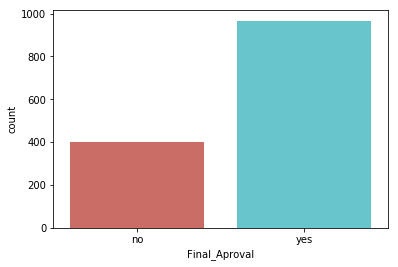

In [63]:
#here we will be droing different graph for which the things are considered
import seaborn as sns
sns.countplot(x='Final_Aproval',data=df,palette='hls')

#from the plot we can see that there are mAXIMUM NUMBER OF yes more than that of no that they people got the loan section 

In [71]:
#here we can see that the class is imbalanced
count_no_sub = len(df[df['Final_Aproval']=='no'])
count_sub = len(df)-count_no_sub
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 29.385964912280706
percentage of subscription 70.6140350877193


In [72]:
#more exploratory
df.groupby('Final_Aproval').mean()
#from here we can see that maximum of people got the age was above 38 

,loan_id,customer_id,enterprise_id,hub_id,ManagAgeui_APP,ManagCBscoreui_APP,total_disbursement_amount
Final_Aproval,,,,,,,
no,26364.402985,54275.298507,18219.368159,38.833333,37.674129,188.820896,338408.007463
yes,34674.131470,65840.066253,22298.930642,42.178054,38.098344,770.292961,383141.304348


BusinFormalityOfTheBusinessui
Cash & Banked           AxesSubplot(0.125,0.125;0.775x0.755)
Cash & Non Banked       AxesSubplot(0.125,0.125;0.775x0.755)
Invoice & Banked        AxesSubplot(0.125,0.125;0.775x0.755)
Invoice & Non Banked    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

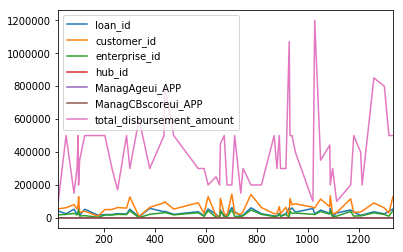

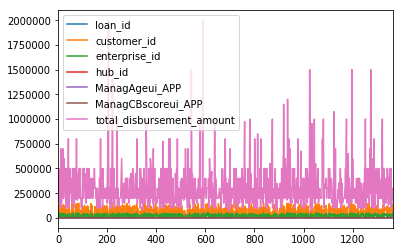

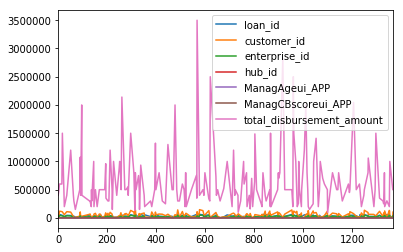

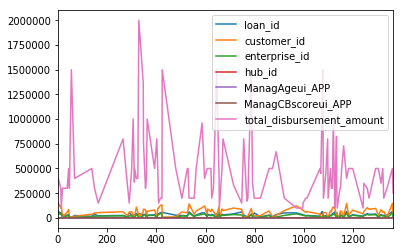

In [77]:

df.groupby('BusinFormalityOfTheBusinessui').plot()


In [78]:
df.groupby('BusinFormalityOfTheBusinessui').mean()


,loan_id,customer_id,enterprise_id,hub_id,ManagAgeui_APP,ManagCBscoreui_APP,total_disbursement_amount
BusinFormalityOfTheBusinessui,,,,,,,
Cash & Banked,32822.210526,63571.192982,21633.719298,41.403509,37.245614,678.842105,395298.245614
Cash & Non Banked,32331.057827,64258.260219,21710.157527,43.076770,38.136590,576.505484,305898.324028
Invoice & Banked,32713.682051,55324.917949,18647.989744,33.538462,37.410256,686.507692,635305.128205
Invoice & Non Banked,30825.727273,59152.327273,20021.945455,37.572727,37.763636,609.163636,471109.090909


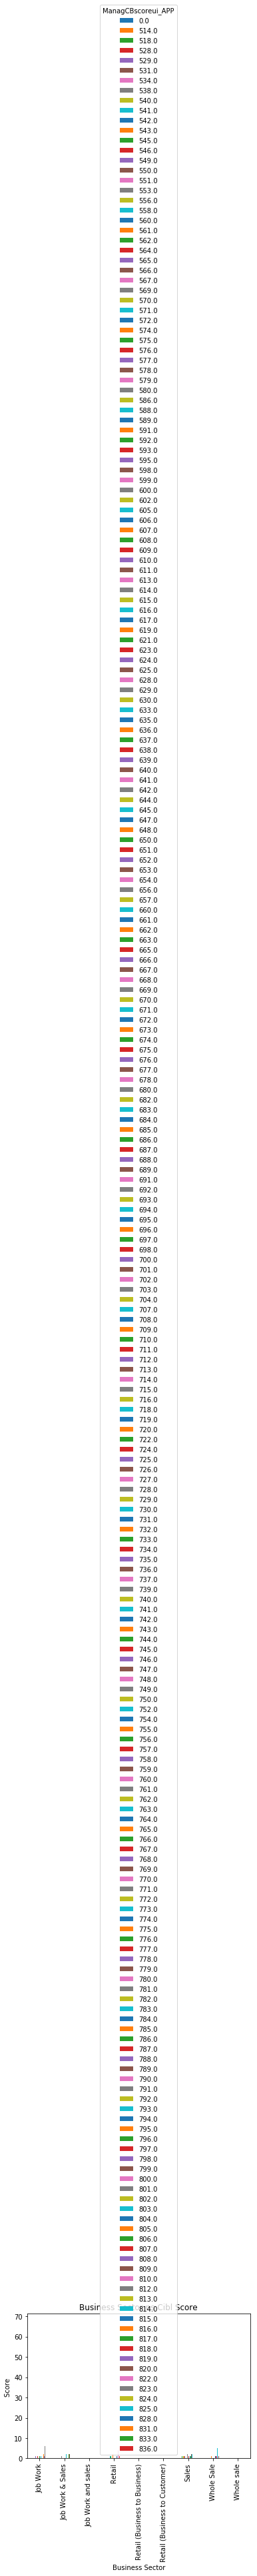

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(df.business_activity,df.ManagCBscoreui_APP).plot(kind='bar')
plt.title('Business Sector ns Cibl Score')
plt.xlabel('Business Sector')
plt.ylabel('Score ')
plt.savefig('purchase_fre_job')
plt.show()

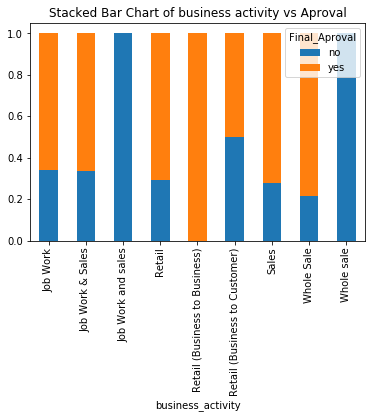

In [84]:
table=pd.crosstab(df.business_activity,df.Final_Aproval)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of business activity vs Aproval')
plt.savefig('mariral_vs_pur_stack')
plt.show()

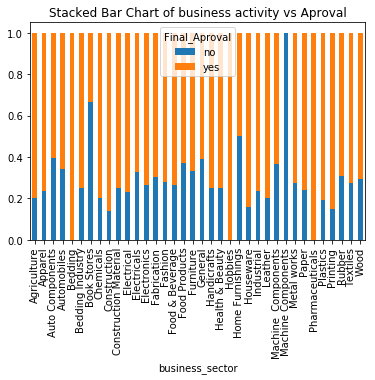

In [85]:
table=pd.crosstab(df.business_sector,df.Final_Aproval)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of business activity vs Aproval')
plt.savefig('mariral_vs_pur_stack')
plt.show()

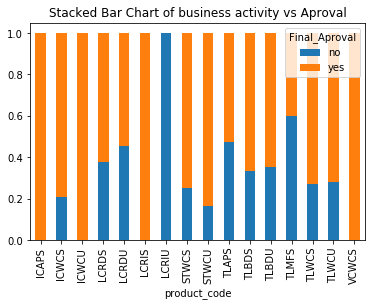

In [87]:
table=pd.crosstab(df.product_code,df.Final_Aproval)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of business activity vs Aproval')
plt.savefig('mariral_vs_pur_stack')
plt.show()

In [42]:
data=df[['enterprise_id','product_code','hub_id','business_type','business_activity','business_sector','ManagAgeui_APP','BusinFormalityOfTheBusinessui','ManagCBscoreui_APP','total_disbursement_amount']]
#from sklearn import metrics
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 10 columns):
enterprise_id                    1368 non-null float64
product_code                     1368 non-null object
hub_id                           1368 non-null int64
business_type                    1368 non-null object
business_activity                1368 non-null object
business_sector                  1368 non-null object
ManagAgeui_APP                   1368 non-null float64
BusinFormalityOfTheBusinessui    1365 non-null object
ManagCBscoreui_APP               1368 non-null float64
total_disbursement_amount        1368 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 107.0+ KB


In [43]:
#one hot encoding for the following set of column value
cat_vars=['product_code','business_type','business_activity','business_sector','BusinFormalityOfTheBusinessui']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['enterprise_id', 'product_code', 'hub_id', 'business_type',
       'business_activity', 'business_sector', 'ManagAgeui_APP',
       'BusinFormalityOfTheBusinessui', 'ManagCBscoreui_APP',
       'total_disbursement_amount', 'product_code_ICAPS',
       'product_code_ICWCS', 'product_code_ICWCU', 'product_code_LCRDS',
       'product_code_LCRDU', 'product_code_LCRIS', 'product_code_LCRIU',
       'product_code_STWCS', 'product_code_STWCU', 'product_code_TLAPS',
       'product_code_TLBDS', 'product_code_TLBDU', 'product_code_TLMFS',
       'product_code_TLWCS', 'product_code_TLWCU', 'product_code_VCWCS',
       'business_type_Manufacturing', 'business_type_Services',
       'business_type_Trading', 'business_activity_Job Work',
       'business_activity_Job Work & Sales',
       'business_activity_Job Work and sales', 'business_activity_Retail',
       'business_activity_Retail (Business to Business)',
       'business_activity_Retail (Business to Customer)',
       'business_acti

In [51]:
data_final=data_final[['enterprise_id', 'hub_id','ManagAgeui_APP',
       'ManagCBscoreui_APP',
       'total_disbursement_amount', 'product_code_ICAPS',
       'product_code_ICWCS', 'product_code_ICWCU', 'product_code_LCRDS',
       'product_code_LCRDU', 'product_code_LCRIS', 'product_code_LCRIU',
       'product_code_STWCS', 'product_code_STWCU', 'product_code_TLAPS',
       'product_code_TLBDS', 'product_code_TLBDU', 'product_code_TLMFS',
       'product_code_TLWCS', 'product_code_TLWCU', 'product_code_VCWCS',
       'business_type_Manufacturing', 'business_type_Services',
       'business_type_Trading', 'business_activity_Job Work',
       'business_activity_Job Work & Sales',
       'business_activity_Job Work and sales', 'business_activity_Retail',
       'business_activity_Retail (Business to Business)',
       'business_activity_Retail (Business to Customer)',
       'business_activity_Sales', 'business_activity_Whole Sale',
       'business_activity_Whole sale', 'business_sector_Agriculture',
       'business_sector_Apparel', 'business_sector_Auto Components',
       'business_sector_Automobiles', 'business_sector_Bedding',
       'business_sector_Bedding Industry', 'business_sector_Book Stores',
       'business_sector_Chemicals', 'business_sector_Construction',
       'business_sector_Construction Material',
       'business_sector_Electrical', 'business_sector_Electricals',
       'business_sector_Electronics', 'business_sector_Fabrication',
       'business_sector_Fashion', 'business_sector_Food & Beverage',
       'business_sector_Food Products', 'business_sector_Furniture',
       'business_sector_General', 'business_sector_Handicrafts',
       'business_sector_Health & Beauty', 'business_sector_Hobbies',
       'business_sector_Home Furnishings', 'business_sector_Houseware',
       'business_sector_Industrial', 'business_sector_Leather',
       'business_sector_Machine  Components',
       'business_sector_Machine Components',
       'business_sector_Metal works', 'business_sector_Paper',
       'business_sector_Pharmaceuticals', 'business_sector_Plastics',
       'business_sector_Printing', 'business_sector_Rubber',
       'business_sector_Textiles', 'business_sector_Wood',
       'BusinFormalityOfTheBusinessui_Cash & Banked',
       'BusinFormalityOfTheBusinessui_Cash & Non Banked',
       'BusinFormalityOfTheBusinessui_Invoice & Banked',
       'BusinFormalityOfTheBusinessui_Invoice & Non Banked']]

In [49]:
cols_use=['enterprise_id','hub_id','ManagAgeui_APP', 'ManagCBscoreui_APP',
       'total_disbursement_amount', 'product_code_ICAPS',
       'product_code_ICWCS', 'product_code_ICWCU', 'product_code_LCRDS',
       'product_code_LCRDU', 'product_code_LCRIS', 'product_code_LCRIU',
       'product_code_STWCS', 'product_code_STWCU', 'product_code_TLAPS',
       'product_code_TLBDS', 'product_code_TLBDU', 'product_code_TLMFS',
       'product_code_TLWCS', 'product_code_TLWCU', 'product_code_VCWCS',
       'business_type_', 'business_type_Manufacturing',
       'business_type_Services', 'business_type_Trading',
       'business_activity_Job Work', 'business_activity_Job Work & Sales',
       'business_activity_Job Work and sales', 'business_activity_Retail',
       'business_activity_Retail (Business to Business)',
       'business_activity_Retail (Business to Customer)',
       'business_activity_Sales', 'business_activity_Whole Sale',
       'business_activity_Whole sale', 'business_sector_Agriculture',
       'business_sector_Apparel', 'business_sector_Auto Components',
       'business_sector_Automobiles', 'business_sector_Bedding',
       'business_sector_Bedding Industry', 'business_sector_Book Stores',
       'business_sector_Chemicals', 'business_sector_Construction',
       'business_sector_Construction Material',
       'business_sector_Electrical', 'business_sector_Electricals',
       'business_sector_Electronics', 'business_sector_Fabrication',
       'business_sector_Fashion', 'business_sector_Food & Beverage',
       'business_sector_Food Products', 'business_sector_Furniture',
       'business_sector_General', 'business_sector_Handicrafts',
       'business_sector_Health & Beauty', 'business_sector_Hobbies',
       'business_sector_Home Furnishings', 'business_sector_Houseware',
       'business_sector_Industrial', 'business_sector_Leather',
       'business_sector_Machine  Components',
       'business_sector_Machine Components',
       'business_sector_Metal works', 'business_sector_Paper',
       'business_sector_Pharmaceuticals', 'business_sector_Plastics',
       'business_sector_Printing', 'business_sector_Rubber',
       'business_sector_Textiles', 'business_sector_Wood',
       'BusinFormalityOfTheBusinessui_Cash & Banked',
       'BusinFormalityOfTheBusinessui_Cash & Non Banked',
       'BusinFormalityOfTheBusinessui_Invoice & Banked',
       'BusinFormalityOfTheBusinessui_Invoice & Non Banked']

In [54]:
data_final.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
data_final['Final_Aproval']=np.where(data_final['ManagCBscoreui_APP']>650, 1, 0)
target=data_final['Final_Aproval']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
#droping a column
data_final.drop("Final_Aproval",axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(data_final, target, test_size = 0.25, random_state = 42)

In [58]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1026, 73)
Training Labels Shape: (1026,)
Testing Features Shape: (342, 73)
Testing Labels Shape: (342,)


In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_features, train_labels)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
y_pred = logreg.predict(test_features)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_features, test_labels)))

Accuracy of logistic regression classifier on test set: 0.90
